<a href="https://colab.research.google.com/github/yumeniown/modul-1_7/blob/main/%D0%BC%D0%B4%D0%BB1_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задания
1. В исходных данных стандартизируйте исходный признак price_doc
2. В исходных данных найдите потенциальные выбросы по признаку price_doc с помощью метода z-отклонения. Используйте логарифмический масштаб распределения. Сделайте «послабление» на 0.7 сигм в обе стороны распределения. Сколько выбросов вы получили?
3. Добавьте фишку с логарифмированием в свою функцию outliers_iqr(). Добавьте в неё параметр log_scale. Если он выставлен в True, то производится логарифмирование признака. Примените полученную функцию к признаку price_doc. Число межквартильных размахов в обе стороны обозначьте как 3.

In [ ]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
cwd = os.getcwd()
print(cwd)

Mounted at /content/drive
/content


In [ ]:
sber_data = pd.read_csv('drive/MyDrive/sber_data.csv')
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


1) В исходных данных стандартизируйте исходный признак price_doc

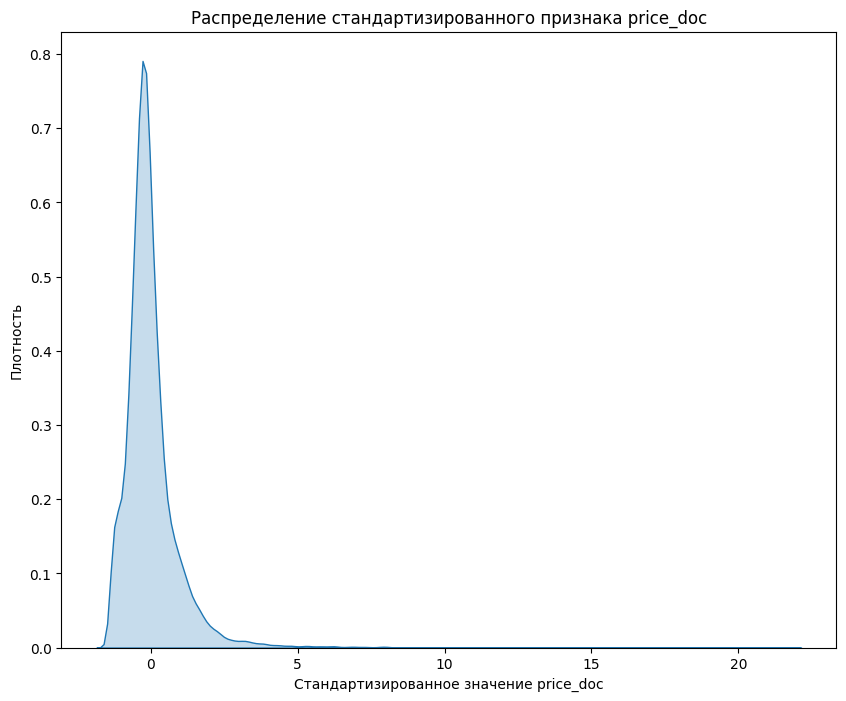

In [ ]:
from sklearn import preprocessing

s_scaler = preprocessing.StandardScaler() # инициализируем стандартизатор StandardScaler

df_s = s_scaler.fit_transform(sber_data[['price_doc']]) # кодируем исходный датасет

df_s = pd.DataFrame(df_s, columns=['df_s']) # преобразуем промежуточный датасет в полноценный датафрейм для визуализации

fig, ax1 = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределение стандартизированного признака price_doc')

sns.kdeplot(df_s['df_s'], ax=ax1, fill=True)
plt.xlabel('Стандартизированное значение price_doc')
plt.ylabel('Плотность')
plt.show()

In [ ]:
df_s.describe()

,df_s
count,3.047100e+04
mean,-8.954364e-17
std,1.000016e+00
min,-1.469244e+00
25%,-4.985391e-01
50%,-1.775352e-01
75%,2.462252e-01
max,2.175468e+01


2) В исходных данных найдите потенциальные выбросы по признаку price_doc с помощью метода z-отклонения. Используйте логарифмический масштаб распределения. Сделайте «послабление» на 0.7 сигм в обе стороны распределения. Сколько выбросов вы получили?

Количество выбросов: 52


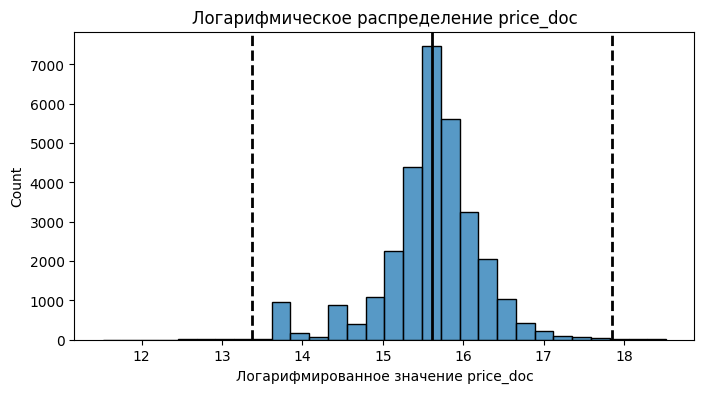

In [ ]:
def outliers_z_score(data, feature, log_scale=False, left=3, right=3):
  if log_scale:
    x = np.log(data[feature] + 1)
  else:
    x = data[feature]

  mu = x.mean()
  sigma = x.std()
  lower_bound = mu - left * sigma
  upper_bound = mu + right * sigma
  outliers = data[(x < lower_bound) | (x > upper_bound)]
  cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
  return outliers, cleaned

outliers, cleaned = outliers_z_score(sber_data, 'price_doc', log_scale=True, left=3.7, right = 3.7)
num_outliers = outliers.shape[0]

print(f'Количество выбросов: {num_outliers}')

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_price_doc = np.log(sber_data['price_doc'] + 1)
histplot = sns.histplot(log_price_doc, bins=30, ax=ax)
histplot.axvline(log_price_doc.mean(), color='k', lw=2)
histplot.axvline(log_price_doc.mean() + 3.7 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.axvline(log_price_doc.mean() - 3.7 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.set_title('Логарифмическое распределение price_doc')
plt.xlabel('Логарифмированное значение price_doc')
plt.ylabel('Count')
plt.show()

или

Количество выбросов: 52


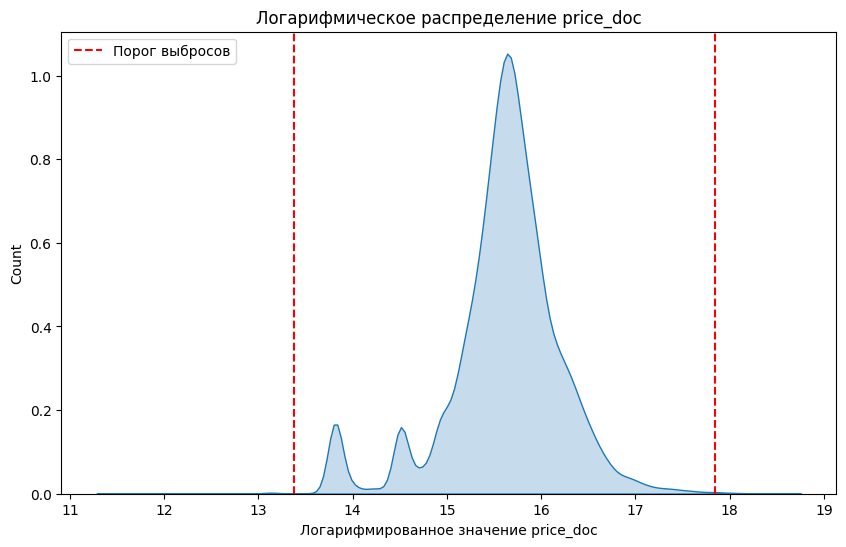

In [ ]:
def outliers_z_score(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature] + 1)
    else:
        x = data[feature]

    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(sber_data, 'price_doc', log_scale=True, left=3.7, right=3.7)
num_outliers = outliers.shape[0]

print(f"Количество выбросов: {num_outliers}")

plt.figure(figsize=(10, 6))
sns.kdeplot(np.log(sber_data['price_doc']), fill=True)
plt.axvline(x=np.log(sber_data['price_doc']).mean() + 3.7 * np.log(sber_data['price_doc']).std(), color='r', linestyle='--', label='Порог выбросов')
plt.axvline(x=np.log(sber_data['price_doc']).mean() - 3.7 * np.log(sber_data['price_doc']).std(), color='r', linestyle='--')
plt.title('Логарифмическое распределение price_doc')
plt.xlabel('Логарифмированное значение price_doc')
plt.ylabel('Count')
plt.legend()
plt.show()


3. Добавьте фишку с логарифмированием в свою функцию outliers_iqr(). Добавьте в неё параметр log_scale. Если он выставлен в True, то производится логарифмирование признака. Примените полученную функцию к признаку price_doc. Число межквартильных размахов в обе стороны обозначьте как 3.

Количество выбросов: 92


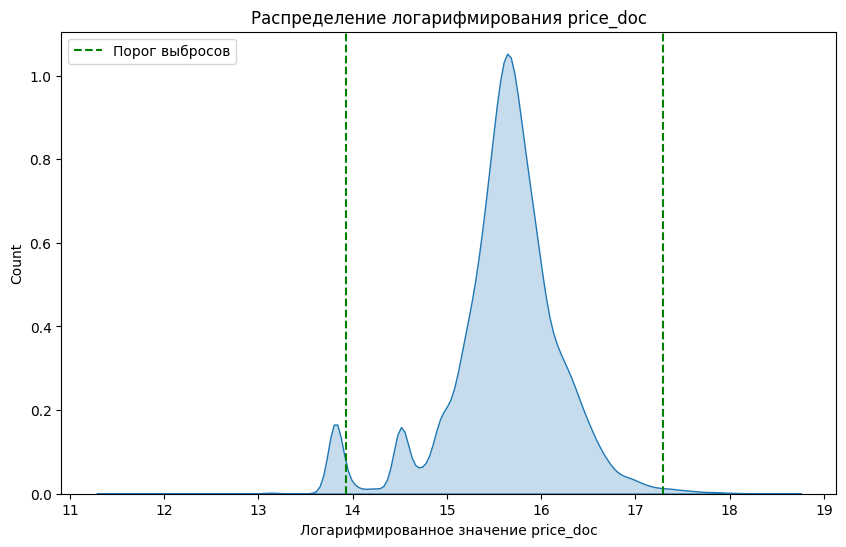

In [ ]:
def outliers_iqr(data, feature, left=1.5, right=1.5, log_scale=False):
    x = data[feature]
    if log_scale:
        x = np.log(x + 1)

    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1

    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)

    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]

    return outliers, cleaned

outliers, cleaned = outliers_iqr(sber_data, 'price_doc', left=3, right=3, log_scale=True)
num_outliers_iqr = outliers.shape[0]

print(f"Количество выбросов: {num_outliers_iqr}")

plt.figure(figsize=(10, 6))
sns.kdeplot(np.log(sber_data['price_doc']), fill=True)
plt.axvline(x=np.log(sber_data['price_doc']).mean() + 3 * (np.percentile(np.log(sber_data['price_doc']), 75) - np.percentile(np.log(sber_data['price_doc']), 25)), color='g', linestyle='--', label='Порог выбросов')
plt.axvline(x=np.log(sber_data['price_doc']).mean() - 3 * (np.percentile(np.log(sber_data['price_doc']), 75) - np.percentile(np.log(sber_data['price_doc']), 25)), color='g', linestyle='--')
plt.title('Распределение логарифмирования price_doc')
plt.xlabel('Логарифмированное значение price_doc')
plt.ylabel('Count')
plt.legend()
plt.show()
